## Collecting and Preparing the Data

In [1]:
# Importing the Necessary Modules
from tqdm import tqdm
import pandas as pd
import praw
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jackiecollopy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jackiecollopy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Accessing API
user_agent = "Scraper 1.0 by u/colloj"

reddit = praw.Reddit(client_id='-RlNNaCimqKKkJ_aX1FcKg',
                     client_secret='4vSZ7Dm4rtDYXevU8PtIiIK6dtD_Ng',
                     user_agent= user_agent)

In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

for submission in reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'):
    if '[POSTGAME THREAD]' in submission.title:
        print(submission.title)


In [ ]:
# Getting the Data
subreddit_name = 'MkeBucks'

# Define the string you want to search for in post titles
search_string = '[POSTGAME THREAD] Our Milwaukee Bucks'
start_date = '2023-10-23'

post_names = []
comments = []

total_submissions = len(list(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene')))

for submission in tqdm(reddit.subreddit(subreddit_name).search(search_string, time_filter='year', syntax='lucene'), total = total_submissions):
    if '[POSTGAME THREAD]' in submission.title:
        submission.comments.replace_more(limit=None)
        for comment in submission.comments.list():
            comments.append(comment.body)
            post_names.append(submission.title)

post_names, comments

In [ ]:
# Create a DataFrame from the lists
df = pd.DataFrame({'Post_Name': post_names, 'Comment': comments})

# Display the DataFrame
df.head()

In [ ]:
df.to_csv("bucks.csv", index = False)

In [2]:
df = pd.read_csv("bucks.csv")
df.head()

,Post_Name,Comment
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh..."


In [3]:
df["Post_Name"].unique()

array(['[POSTGAME THREAD] Our Milwaukee Bucks (24-10) sputter - 1/3/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (41 - 21) defeat the Los Angeles Clippers (39 - 21) - 113 - 106 - 3/4/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (35 - 21) fall to the Memphis Grizzlies (20 - 36) - 110 - 113 - 2/15/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (1-0) defeat the Philadelphia 76ers (0-1) 118-117 in their season opener - 10/26/2023',
       '[POSTGAME THREAD] Our Milwaukee Bucks (32 - 16) fall to the Portland Trailblazers (14 - 34) - 116 - 119 - 1/31/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (41 - 23) fall to The Los Angeles Lakers (35 - 30) - 122 - 123 - 3/8/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (42- 23) defeat the Los Angeles Clippers (41 - 22) - 124 - 117 - 3/10/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (2-2) fall to the Toronto Raptors (2-3) 111-130 - 11/1/2023',
       '[POSTGAME THREAD] Our Milwaukee Bucks (5-2) defeat the Detr

In [4]:
# Getting the Dates
def get_after_last_space(string):
    return string.split(' ')[-1]
df["Date"] = df["Post_Name"].apply(get_after_last_space)
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,1/3/2024
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,1/3/2024
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",1/3/2024
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,1/3/2024
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",1/3/2024


In [5]:
string = "\n||\t\t\n|:-:|"
string_rows = df["Comment"].str.contains(r'\n||\t\t\n|:-:|', regex = True)
string_rows

0        True
1        True
2        True
3        True
4        True
         ... 
15847    True
15848    True
15849    True
15850    True
15851    True
Name: Comment, Length: 15852, dtype: bool

In [6]:
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023', '

In [7]:
df = df[df["Date"] != "round"]
df["Date"].unique()

array(['1/3/2024', '3/4/2024', '2/15/2024', '10/26/2023', '1/31/2024',
       '3/8/2024', '3/10/2024', '11/1/2023', '11/8/2023', '1/6/2024',
       '1/27/2024', '2/03/2024', '11/6/2023', '1/8/2024', '1/11/2024',
       '2/25/2024', '2/23/2024', '11/11/2023', '3/14/2024', '1/14/2024',
       '11/22/2023', '1/4/2024', '11/18/2023', '11/24/2023', '2/04/2024',
       '3/1/2024', '1/1/2024', '3/12/2024', '04/26/2023', '1/24/2024',
       '2/12/2024', '12/11/2023', '10/20/2023', '2/13/2024', '2/8/2024',
       '11/9/2023', '12/23/2023', '3/6/2024', '11/28/2023', '11/30/2023',
       '1/20/2024', '2/27/2024', '12/13/2023', '11/15/2023', '1/13/2024',
       '11/17/2023', '12/2/2023', '12/17/2023', '12/27/2023', '2/06/2024',
       '10/29/2023', '12/29/2023', '1/17/2024', '11/26/2023',
       '12/21/2023', '11/20/2023', '1/22/2024', '1/26/2024', '04/24/2023',
       '12/19/2023', '12/16/2023', '2/9/2024', '2/29/2024', '11/13/2023',
       '04/22/2023', '04/19/2023', '11/3/2023', '04/16/2023'],


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [9]:
# Getting Data For This Season
df = df[df["Date"] >= "2023-10-26"]
df.head()

,Post_Name,Comment,Date
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03


In [10]:
df["Post_Name"].unique()

array(['[POSTGAME THREAD] Our Milwaukee Bucks (24-10) sputter - 1/3/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (41 - 21) defeat the Los Angeles Clippers (39 - 21) - 113 - 106 - 3/4/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (35 - 21) fall to the Memphis Grizzlies (20 - 36) - 110 - 113 - 2/15/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (1-0) defeat the Philadelphia 76ers (0-1) 118-117 in their season opener - 10/26/2023',
       '[POSTGAME THREAD] Our Milwaukee Bucks (32 - 16) fall to the Portland Trailblazers (14 - 34) - 116 - 119 - 1/31/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (41 - 23) fall to The Los Angeles Lakers (35 - 30) - 122 - 123 - 3/8/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (42- 23) defeat the Los Angeles Clippers (41 - 22) - 124 - 117 - 3/10/2024',
       '[POSTGAME THREAD] Our Milwaukee Bucks (2-2) fall to the Toronto Raptors (2-3) 111-130 - 11/1/2023',
       '[POSTGAME THREAD] Our Milwaukee Bucks (5-2) defeat the Detr

In [13]:
len(df)

12266

In [17]:
# Create the Result Column
def label_column(string):
    if any(word in string for word in ["defeat", "trounce", "beat"]):
        return "Win"
    elif any(word in string for word in ["fall", "sputter", "are defeated"]):
        return "Loss"
    else:
        return "Unknown"
df["Result"] = df["Post_Name"].apply(label_column)
df.head()

,Post_Name,Comment,Date,Result
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss


## Plots

In [38]:
df["Comment_Len"] = df["Comment"].apply(lambda x: len(x))
df.head()

,Post_Name,Comment,Date,Result,Tokens,raw_features,Comment_Adj,Comment_Len
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss,"[, , mil, 130, , 140, ind, box, scores, nba](h...","{'': 1, 'jarace': 1, 'connaughton|14:11|3|1-3|...",|| | : - : | | [ ] ( /MIL ) * * 130 - 140 * * ...,3473
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss,"[took, too, long, to, pull, brook, and, pat, o...","{'minutes': 1, 'took': 1, 'giannis': 1, 'pull'...",Took long pull Brook Pat give minutes Jackson ...,116
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss,"[the, bucks, for, whatever, reason, look, like...","{'they': 1, 'playing': 1, 'this': 1, 'we': 1, ...","Bucks , whatever reason , look like want part ...",166
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss,"[lmfao, if, brunson, tears, this, team, apart,...","{'sick': 1, 'tears': 1, 'damn': 1, 'nuclear': ...",lmfao brunson tears team apart tyrese haliburt...,129
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss,"[hear, me, out, first, blessoe, then, jrue, sh...","{'hope': 1, 'then': 1, 'me': 1, 'sequence': 1,...","Hear ... First blessoe jrue , shoot well regul...",162


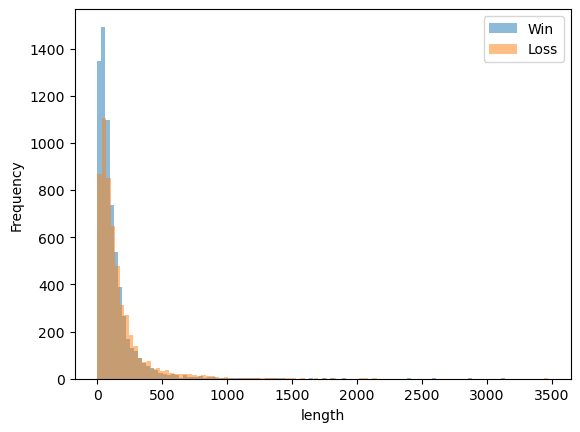

In [51]:
plt.figure()
df[df["Result"]=='Win']["Comment_Len"].plot.hist(bins=100, label='Win', alpha=.5)
df[df["Result"]=='Loss']["Comment_Len"].plot.hist(bins=100, label='Loss', alpha=.5)
plt.legend()
plt.xlabel('length')
plt.show()

## Featurize

In [18]:
def tokenize(document, strip_punct=True, ignore_case=True):
    # YOUR CODE HERE
    document = document.split()
    if strip_punct:
        for item in document:
            document = [re.sub(r'^\W+|\W+$', "", item) for item in document]
            
    if ignore_case:
        document = [item.lower() for item in document]

    return document

df["Tokens"] = [tokenize(d, strip_punct=True, ignore_case=True) for d in df["Comment"]]
df.head()    

,Post_Name,Comment,Date,Result,Tokens
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss,"[, , mil, 130, , 140, ind, box, scores, nba](h..."
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss,"[took, too, long, to, pull, brook, and, pat, o..."
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss,"[the, bucks, for, whatever, reason, look, like..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss,"[lmfao, if, brunson, tears, this, team, apart,..."
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss,"[hear, me, out, first, blessoe, then, jrue, sh..."


In [19]:
def featurize(tokens):
    # YOUR CODE HERE
    token_dict = {word: 1 for word in set(tokens)}
    return token_dict
    raise NotImplementedError()
df['raw_features'] = [featurize(t) for t in df["Tokens"]]
df.head()

,Post_Name,Comment,Date,Result,Tokens,raw_features
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss,"[, , mil, 130, , 140, ind, box, scores, nba](h...","{'': 1, 'jarace': 1, 'connaughton|14:11|3|1-3|..."
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss,"[took, too, long, to, pull, brook, and, pat, o...","{'minutes': 1, 'took': 1, 'giannis': 1, 'pull'..."
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss,"[the, bucks, for, whatever, reason, look, like...","{'they': 1, 'playing': 1, 'this': 1, 'we': 1, ..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss,"[lmfao, if, brunson, tears, this, team, apart,...","{'sick': 1, 'tears': 1, 'damn': 1, 'nuclear': ..."
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss,"[hear, me, out, first, blessoe, then, jrue, sh...","{'hope': 1, 'then': 1, 'me': 1, 'sequence': 1,..."


In [20]:
def count_word_document_frequency(dict_list):
    # YOUR CODE HERE
    counter = Counter()
    for dct in dict_list:
        counter.update(dct.keys())
    return counter
    raise NotImplementedError()
word_counts = count_word_document_frequency(df["raw_features"])

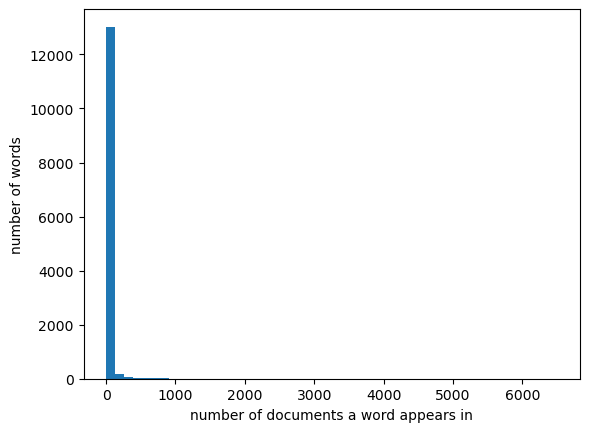

[(1, 6576), (2, 1764), (3, 935), (4, 596), (5, 389)]

In [21]:
plt.figure()
plt.hist(word_counts.values(), bins=50)
plt.xlabel('number of documents a word appears in')
plt.ylabel('number of words')
plt.show()
Counter(word_counts.values()).most_common(5)

In [22]:
word_counts.most_common(30)

[('the', 6501),
 ('a', 4524),
 ('to', 4405),
 ('and', 4047),
 ('is', 3157),
 ('in', 3148),
 ('i', 2979),
 ('of', 2914),
 ('that', 2723),
 ('this', 2432),
 ('it', 2253),
 ('for', 2209),
 ('but', 2171),
 ('we', 2149),
 ('on', 2114),
 ('he', 2068),
 ('was', 1974),
 ('game', 1946),
 ('with', 1720),
 ('be', 1685),
 ('dame', 1667),
 ('like', 1599),
 ('giannis', 1590),
 ('not', 1562),
 ('team', 1554),
 ('just', 1545),
 ('have', 1466),
 ('they', 1392),
 ('you', 1386),
 ('are', 1223)]

## Data Preprocessing Before Modeling

In [23]:
len(df)

12266

In [24]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

In [25]:
df["Comment_Adj"] = df["Comment"].apply(remove_stop_words)
df.head()

,Post_Name,Comment,Date,Result,Tokens,raw_features,Comment_Adj
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss,"[, , mil, 130, , 140, ind, box, scores, nba](h...","{'': 1, 'jarace': 1, 'connaughton|14:11|3|1-3|...",|| | : - : | | [ ] ( /MIL ) * * 130 - 140 * * ...
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss,"[took, too, long, to, pull, brook, and, pat, o...","{'minutes': 1, 'took': 1, 'giannis': 1, 'pull'...",Took long pull Brook Pat give minutes Jackson ...
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss,"[the, bucks, for, whatever, reason, look, like...","{'they': 1, 'playing': 1, 'this': 1, 'we': 1, ...","Bucks , whatever reason , look like want part ..."
3,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,lmfao if brunson tears this team apart tyrese ...,2024-01-03,Loss,"[lmfao, if, brunson, tears, this, team, apart,...","{'sick': 1, 'tears': 1, 'damn': 1, 'nuclear': ...",lmfao brunson tears team apart tyrese haliburt...
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss,"[hear, me, out, first, blessoe, then, jrue, sh...","{'hope': 1, 'then': 1, 'me': 1, 'sequence': 1,...","Hear ... First blessoe jrue , shoot well regul..."


## Player DataFrame

In [26]:
player_list = ["marjon", "dame", "malik", "chris", "bobby", "brook", "danilo", "aj",
              "pat", "khris", "tyty", "pat", "giannis", "thanasis", "andre",
              "ryan", "jae", "doc", "griffin", "beauchamp", "lillard", "beasley", "livingston",
              "portis", "lopez", "gallinari", "green", "beverley", "bev", "middleton", "washington",
              "connaughton", "antetokounmpo", "jackson", "rollins", "crowder", "rivers", "adrian"]

pattern = '|'.join(player_list)

# Extract rows containing at least one of the words
filtered_df = df[df['Comment'].str.contains(pattern, case=False, na=False)]

filtered_df.head()

,Post_Name,Comment,Date,Result,Tokens,raw_features,Comment_Adj
0,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,\n||\t\t\n|:-:|\t\t\n|[](/MIL) **130 - 140** ...,2024-01-03,Loss,"[, , mil, 130, , 140, ind, box, scores, nba](h...","{'': 1, 'jarace': 1, 'connaughton|14:11|3|1-3|...",|| | : - : | | [ ] ( /MIL ) * * 130 - 140 * * ...
1,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,Took too long to pull Brook and Pat out and gi...,2024-01-03,Loss,"[took, too, long, to, pull, brook, and, pat, o...","{'minutes': 1, 'took': 1, 'giannis': 1, 'pull'...",Took long pull Brook Pat give minutes Jackson ...
2,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"The Bucks, for whatever reason, look like they...",2024-01-03,Loss,"[the, bucks, for, whatever, reason, look, like...","{'they': 1, 'playing': 1, 'this': 1, 'we': 1, ...","Bucks , whatever reason , look like want part ..."
4,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,"Hear me out... \n\nFirst blessoe then jrue, sh...",2024-01-03,Loss,"[hear, me, out, first, blessoe, then, jrue, sh...","{'hope': 1, 'then': 1, 'me': 1, 'sequence': 1,...","Hear ... First blessoe jrue , shoot well regul..."
5,[POSTGAME THREAD] Our Milwaukee Bucks (24-10) ...,We're almost halfway through the season so I t...,2024-01-03,Loss,"[we're, almost, halfway, through, the, season,...","{'contribute': 1, 'khris': 1, 'notable': 1, 's...",'re almost halfway season think critical discu...


In [27]:
len(filtered_df)

4944

In [28]:
from sklearn.model_selection import train_test_split

X = filtered_df["Comment_Adj"]
y = filtered_df["Result"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [30]:
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.660262891809909


## Naive Bayes Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = df["Comment_Adj"]
y = df["Result"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [57]:
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: pos_label=1 is not a valid label. It should be one of ['Loss', 'Win']

## Logistic Regression Model

In [34]:
vec = CountVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

        Loss       0.60      0.49      0.54      1124
         Win       0.63      0.73      0.67      1330

    accuracy                           0.62      2454
   macro avg       0.62      0.61      0.61      2454
weighted avg       0.62      0.62      0.61      2454



## Convolutional Neural Network

In [ ]:
# Remove Stopwords

In [ ]:
# Lemmatize